In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree

In [3]:
# Load data from csv
df = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')
df = df.append(df_test)

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


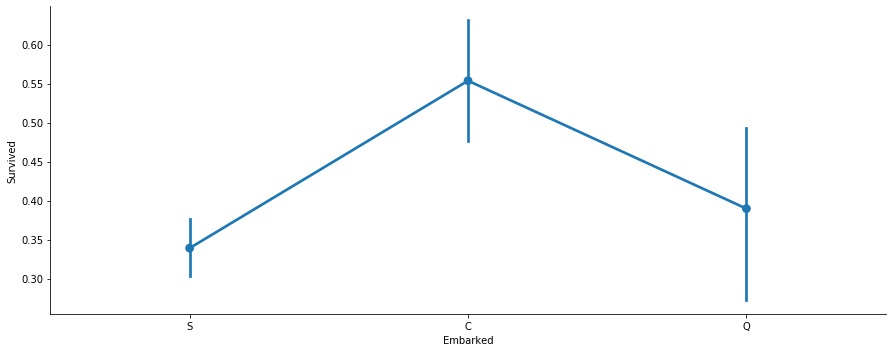

In [6]:
# Fill embarked
# A quick inspect shows that here are 2 embarked values missing. Since this number is
# small, we fill the missing values with the most common class 'S'.
# As demonstrated in the plot, there is definitely a correlation between embarked and 
# the survival rate. Passengers from port 'Southampton' have only 34% of survival rate 
# while those from the port 'Cherbourg' have 55% chance.
df.Embarked = df.Embarked.fillna('S')
axes = sns.factorplot('Embarked','Survived', data=df, aspect = 2.5)

df.Fare = df.Fare.fillna(df.Fare.mean())

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


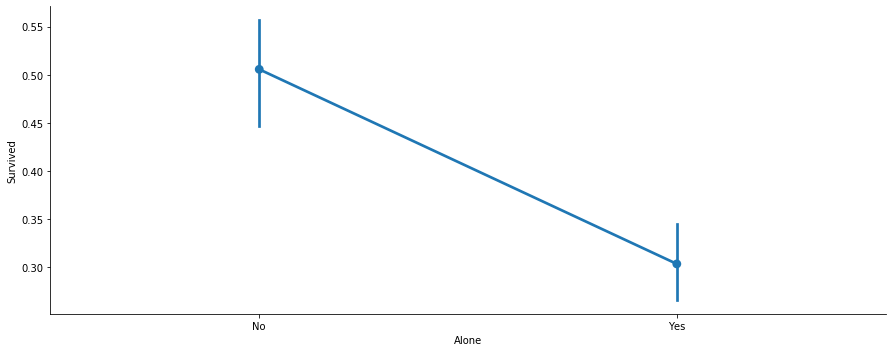

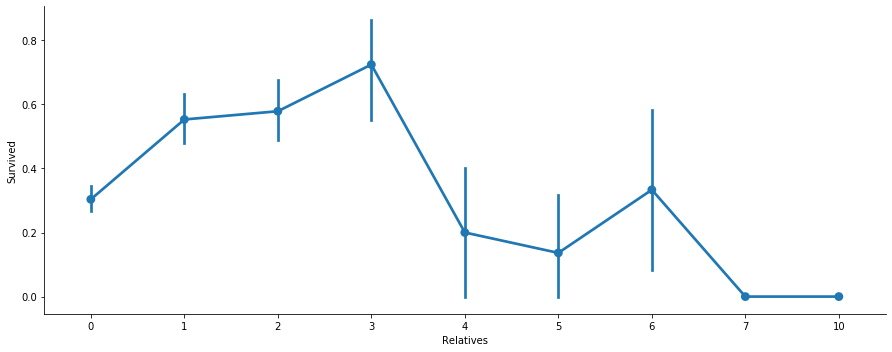

In [7]:
# Add features called Alone and Relatives
# Passengers traveled with families have higher survival rate than travel alone. Also, 
# passengers with 2 to 3 family members on board tends to have better chance of survival.
# As demonstrated in the plot, passenders travaled with 3 family members have 70% survival rate
# while passenger traveled with large family, 7-8 members have 0% survival rate.

df['Relatives'] = df['SibSp'] + df['Parch']
df.loc[df['Relatives'] > 0, 'Alone'] = 'No'
df.loc[df['Relatives'] == 0, 'Alone'] = 'Yes'
axes = sns.factorplot('Alone','Survived', data=df, aspect = 2.5)
axes = sns.factorplot('Relatives','Survived', data=df, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


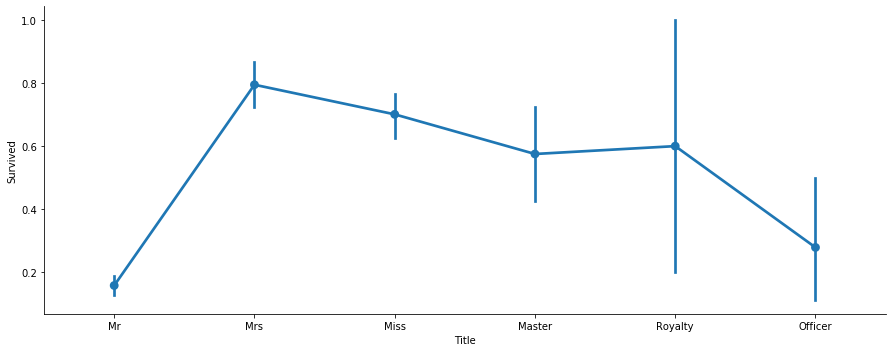

In [9]:
# Extract the passenger's Title from Name
# We created an additonal features called Title to explore the correlation between survival rate
# based on the passenger's social status. The titles can be classified into 3 main categories,
# Royalty, Workers and Civilians. Class worker includes Master and Officers where Offers have
# only 30% survival rate while Masters have about 60%. Royalites also have a high survival rate
# at just above 60%. On the other hand, male civilians do not stand much chance to survive. Only
# 10% of male who are civilian survived. Guess Jack didn't make the cut :(
df2 = df
df2['Title'] = df2.Name
df2.Title = df2.Title.replace(regex={
    r'.*, Capt.*': 'Officer',
    r'.*, Col.*': 'Officer',
    r'.*, Major.*': 'Officer',
    r'.*, Jonkheer.*': 'Royalty',
    r'.*, Don.*': 'Royalty',
    r'.*, Sir.*': 'Royalty',
    r'.*, Dr.*': 'Officer',
    r'.*, Rev.*': 'Officer',
    r'.*, the Countess.*': 'Royalty',
    r'.*, Mme.*': 'Mrs',
    r'.*, Mlle.*': 'Miss',
    r'.*, Ms.*': 'Mrs',
    r'.*, Mrs.*': 'Mrs',
    r'.*, Mr.*': 'Mr',
    r'.*, Miss.*': 'Miss',
    r'.*, Master.*': 'Master',
    r'.*, Lady.*': 'Royalty'
})
axes = sns.factorplot('Title','Survived', data=df2, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

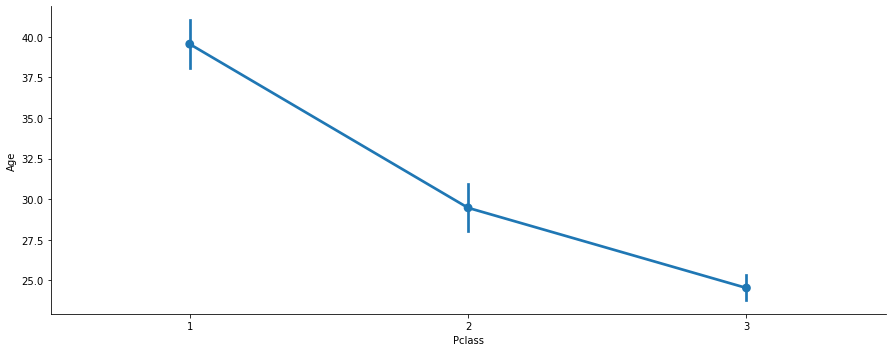

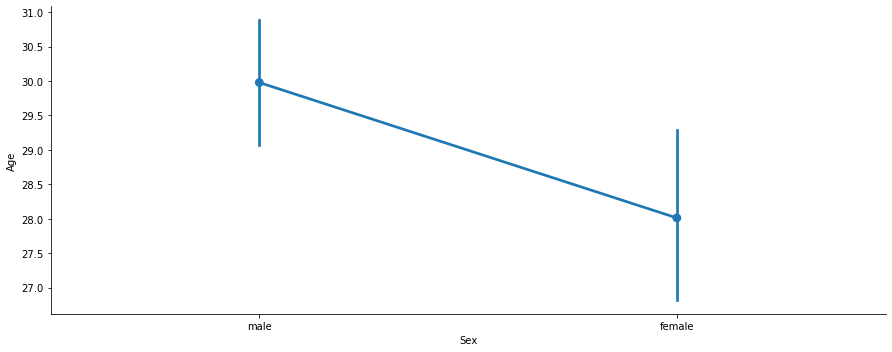

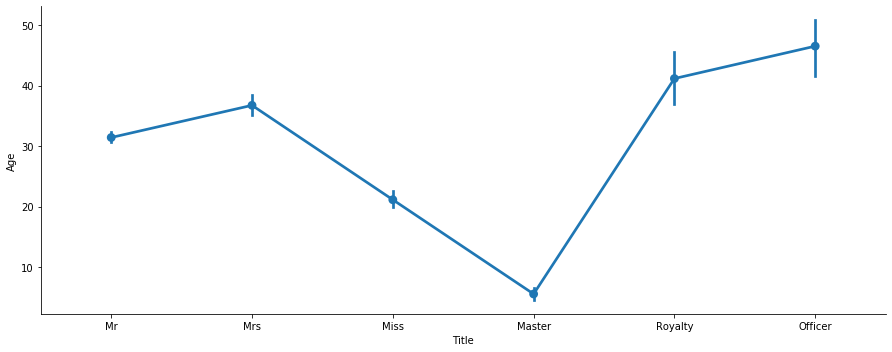

In [10]:
# fill age based on sex, class and title
# A quick inspect using .info() shows there are 263 passengers have the value Age missing. This
# is quite a large amount considering the dataset have only 1309 samples. Filling the age with
# mean would be an option, but may not be the best approach. Instead, we use the median based on
# three other features, Sex, Pclass and Title. As demonstrated in the plots, the passenger's age
# are highly influenced by these three features.
df3 = df2
grouped = df3.groupby(['Sex', 'Pclass', 'Title'])
grouped_median = grouped.median()
grouped_median = grouped_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(row):
    condition = (
        (grouped_median['Sex'] == row['Sex']) &
        (grouped_median['Title'] == row['Title']) &
        (grouped_median['Pclass'] == row['Pclass'])
    )
    if np.isnan(grouped_median[condition]['Age'].values[0]):
        condition = (
            (grouped_median['Sex'] == row['Sex']) &
            (grouped_median['Pclass'] == row['Pclass'])
        )
    return grouped_median[condition]['Age'].values[0]

df3['Age'] = df3.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
axes = sns.factorplot('Pclass','Age', data=df2, aspect = 2.5)
axes = sns.factorplot('Sex','Age', data=df2, aspect = 2.5)
axes = sns.factorplot('Title','Age', data=df2, aspect = 2.5)


C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


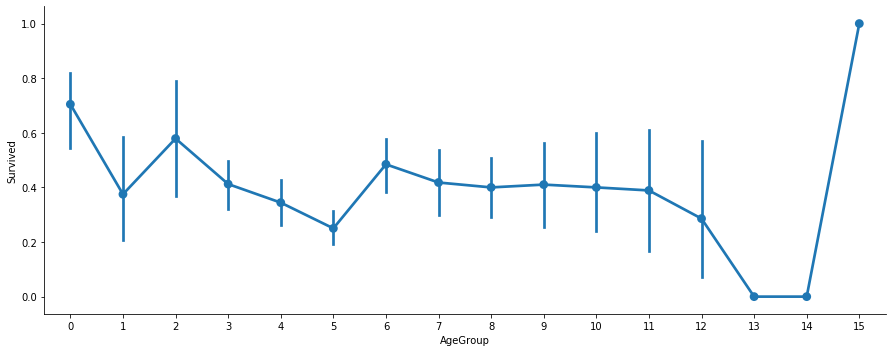

In [11]:
# Add a feature called AgeGroup

bins = list(range(0, 81, 5))
labels = list(range(len(bins)-1))
df3['AgeGroup'] = pd.cut(df3.Age, bins, labels=labels, include_lowest=True)
axes = sns.factorplot('AgeGroup','Survived', data=df3, aspect = 2.5)
df3.AgeGroup = df3.AgeGroup = df.AgeGroup.replace({
    0:3, 
    1:1, 
    2:2, 
    3:2, 
    4:2, 
    5:1, 
    6:2, 
    7:2, 
    8:1, 
    9:3, 
    10:3, 
    11:3, 
    12:1, 
    13:0,
    14:0,
    15:4
})

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


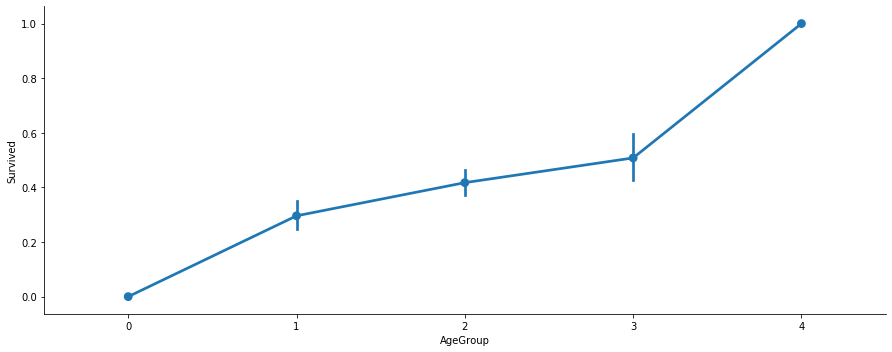

In [12]:
# let's see how it's distributed train_df['Age'].value_counts()
axes = sns.factorplot('AgeGroup','Survived', data=df3, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


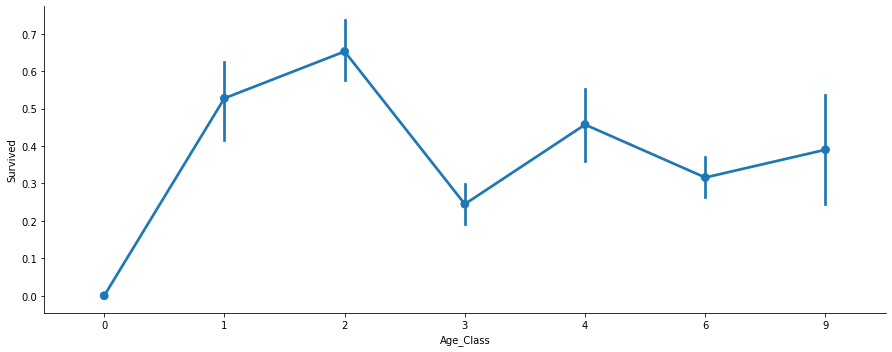

In [13]:

df3['Age_Class']= df3['AgeGroup']* df3['Pclass']
axes = sns.factorplot('Age_Class','Survived', data=df3, aspect = 2.5)

In [14]:
# Convert fare to categories
df3.loc[df3['Fare'] <= 7.91, 'Fare'] = 0
df3.loc[(df3['Fare'] > 7.91) & (df3['Fare'] <= 14.454), 'Fare'] = 1
df3.loc[(df3['Fare'] > 14.454) & (df3['Fare'] <= 31), 'Fare'] = 2
df3.loc[(df3['Fare'] > 31) & (df3['Fare'] <= 99), 'Fare'] = 3
df3.loc[(df3['Fare'] > 99) & (df3['Fare'] <= 250), 'Fare'] = 4
df3.loc[ df3['Fare'] > 250, 'Fare'] = 5
df3['Fare'] = df3['Fare'].astype(int)

In [15]:
df3['Fare_Per_Person'] = df3['Fare']/(df3['Relatives']+1)
df3['Fare_Per_Person'] = df3['Fare_Per_Person'].astype(int)

In [16]:
df3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone,Title,AgeGroup,Age_Class,Fare_Per_Person
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,1,No,Mr,2,6,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,1,No,Mrs,2,2,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1,NaN,S,0,Yes,Miss,1,3,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,1,No,Mrs,2,2,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,0,Yes,Mr,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,26.0,0,0,A.5. 3236,1,NaN,S,0,Yes,Mr,1,3,1
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4,C105,C,0,Yes,Royalty,2,2,4
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,0,NaN,S,0,Yes,Mr,2,6,0


In [17]:
# Select features for training
df4 = df3
df4 = df4.loc[:, ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Age_Class', 'Embarked', 'Pclass']]
labels = df3['Survived'].dropna()

In [18]:
df4

,Sex,Title,AgeGroup,Fare,Relatives,Age_Class,Embarked,Pclass
PassengerId,,,,,,,,
1,male,Mr,2,0,1,6,S,3
2,female,Mrs,2,3,1,2,C,1
3,female,Miss,1,1,0,3,S,3
4,female,Mrs,2,3,1,2,S,1
5,male,Mr,2,1,0,6,S,3
...,...,...,...,...,...,...,...,...
1305,male,Mr,1,1,0,3,S,3
1306,female,Royalty,2,4,0,2,C,1
1307,male,Mr,2,0,0,6,S,3


In [19]:
labels

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float64

In [20]:
# Scaling the numerical data
from sklearn.preprocessing import StandardScaler

numeric_features = list(df4.select_dtypes(include=['int64', 'float64', 'int32']).columns)
scaler = StandardScaler()
df4[numeric_features] = scaler.fit_transform(df4[numeric_features])

In [21]:
df4

,Sex,Title,AgeGroup,Fare,Relatives,Age_Class,Embarked,Pclass
PassengerId,,,,,,,,
1,male,Mr,0.353004,-1.248109,0.073352,1.018767,S,0.841916
2,female,Mrs,0.353004,1.124265,0.073352,-0.965706,C,-1.546098
3,female,Miss,-1.091002,-0.457318,-0.558346,-0.469588,S,0.841916
4,female,Mrs,0.353004,1.124265,0.073352,-0.965706,S,-1.546098
5,male,Mr,0.353004,-0.457318,-0.558346,1.018767,S,0.841916
...,...,...,...,...,...,...,...,...
1305,male,Mr,-1.091002,-0.457318,-0.558346,-0.469588,S,0.841916
1306,female,Royalty,0.353004,1.915057,-0.558346,-0.965706,C,-1.546098
1307,male,Mr,0.353004,-1.248109,-0.558346,1.018767,S,0.841916


In [22]:
df4.dtypes

Sex           object
Title         object
AgeGroup     float64
Fare         float64
Relatives    float64
Age_Class    float64
Embarked      object
Pclass       float64
dtype: object

In [23]:
from itertools import combinations

In [105]:
feature_list = ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Age_Class', 'Embarked', 'Pclass']
feature_combinations = list()
for combo in combinations(feature_list,2):
    feature_combinations.append(combo)

In [106]:
feature_combinations

[('Sex', 'Title'),
 ('Sex', 'AgeGroup'),
 ('Sex', 'Fare'),
 ('Sex', 'Relatives'),
 ('Sex', 'Age_Class'),
 ('Sex', 'Embarked'),
 ('Sex', 'Pclass'),
 ('Title', 'AgeGroup'),
 ('Title', 'Fare'),
 ('Title', 'Relatives'),
 ('Title', 'Age_Class'),
 ('Title', 'Embarked'),
 ('Title', 'Pclass'),
 ('AgeGroup', 'Fare'),
 ('AgeGroup', 'Relatives'),
 ('AgeGroup', 'Age_Class'),
 ('AgeGroup', 'Embarked'),
 ('AgeGroup', 'Pclass'),
 ('Fare', 'Relatives'),
 ('Fare', 'Age_Class'),
 ('Fare', 'Embarked'),
 ('Fare', 'Pclass'),
 ('Relatives', 'Age_Class'),
 ('Relatives', 'Embarked'),
 ('Relatives', 'Pclass'),
 ('Age_Class', 'Embarked'),
 ('Age_Class', 'Pclass'),
 ('Embarked', 'Pclass')]

In [108]:
# for k in range(5):
#     exec(f'cat_{k} = k*2')
for index,combo in enumerate(feature_combinations):
    exec(f'df_combo{index} = df4.loc[:,list(combo)]')
#     print(index)
#     encode_features = list(exec(f"df_combo{index}.select_dtypes(include=['object']).columns)")
#     for feature in encode_features:
#         exec(f'df_combo{index} = pd.concat([df_combo{index}, pd.get_dummies(df_combo{index}[feature], prefix=feature)],axis=1)')
#         exec(f'df_combo{index}.drop(feature, axis = 1, inplace=True)'')

In [109]:
df_combo0

,Sex,Title
PassengerId,,
1,male,Mr
2,female,Mrs
3,female,Miss
4,female,Mrs
5,male,Mr
...,...,...
1305,male,Mr
1306,female,Royalty
1307,male,Mr


In [110]:
df_combo27

,Embarked,Pclass
PassengerId,,
1,S,0.841916
2,C,-1.546098
3,S,0.841916
4,S,-1.546098
5,S,0.841916
...,...,...
1305,S,0.841916
1306,C,-1.546098
1307,S,0.841916


In [24]:
# One-Hot encoding
for index in range(0,28,1):
#     print(i)
    exec(f"encode_features_combo{index} = list(df_combo{index}.select_dtypes(include=['object']).columns)")
    for feature in exec(f'encode_features_combo{index}'):
        exec(f'df_combo{index} = pd.concat([df_combo{index}, pd.get_dummies(df_combo{index}[feature], prefix=feature)],axis=1)')
        exec(f'df_combo{index}.drop(feature, axis = 1, inplace=True)')

NameError: name 'df_combo0' is not defined

In [25]:
# One-Hot encoding
encode_features = list(df4.select_dtypes(include=['object']).columns)
for feature in encode_features:
    df4 = pd.concat([df4, pd.get_dummies(df4[feature], prefix=feature)],axis=1)
    df4.drop(feature, axis = 1, inplace=True)

In [26]:
df4

,AgeGroup,Fare,Relatives,Age_Class,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0.353004,-1.248109,0.073352,1.018767,0.841916,0,1,0,0,1,0,0,0,0,0,1
2,0.353004,1.124265,0.073352,-0.965706,-1.546098,1,0,0,0,0,1,0,0,1,0,0
3,-1.091002,-0.457318,-0.558346,-0.469588,0.841916,1,0,0,1,0,0,0,0,0,0,1
4,0.353004,1.124265,0.073352,-0.965706,-1.546098,1,0,0,0,0,1,0,0,0,0,1
5,0.353004,-0.457318,-0.558346,1.018767,0.841916,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.091002,-0.457318,-0.558346,-0.469588,0.841916,0,1,0,0,1,0,0,0,0,0,1
1306,0.353004,1.915057,-0.558346,-0.965706,-1.546098,1,0,0,0,0,0,0,1,1,0,0
1307,0.353004,-1.248109,-0.558346,1.018767,0.841916,0,1,0,0,1,0,0,0,0,0,1


In [27]:
# Train a RandomForst model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
df_train = df4[:891]
y = labels.to_numpy()
X = df_train.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=1888, min_samples_split=5, min_samples_leaf=3, max_features='sqrt', max_depth=11, bootstrap=False)
#clf = RandomForestClassifier(n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features='auto', max_depth=5, bootstrap=True)

In [28]:
df_train

,AgeGroup,Fare,Relatives,Age_Class,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0.353004,-1.248109,0.073352,1.018767,0.841916,0,1,0,0,1,0,0,0,0,0,1
2,0.353004,1.124265,0.073352,-0.965706,-1.546098,1,0,0,0,0,1,0,0,1,0,0
3,-1.091002,-0.457318,-0.558346,-0.469588,0.841916,1,0,0,1,0,0,0,0,0,0,1
4,0.353004,1.124265,0.073352,-0.965706,-1.546098,1,0,0,0,0,1,0,0,0,0,1
5,0.353004,-0.457318,-0.558346,1.018767,0.841916,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,-1.091002,-0.457318,-0.558346,-0.965706,-0.352091,0,1,0,0,0,0,1,0,0,0,1
888,0.353004,0.333474,-0.558346,-0.965706,-1.546098,1,0,0,1,0,0,0,0,0,0,1
889,0.353004,0.333474,1.336749,1.018767,0.841916,1,0,0,1,0,0,0,0,0,0,1


In [29]:
clf.fit(X, y)
print('RandomForst, Train score:', cross_val_score(clf, X_train, y_train, cv=10).mean())
print('RandomForst, Test score:', cross_val_score(clf, X_test, y_test, cv=10).mean())

RandomForst, Train score: 0.8343896713615022
RandomForst, Test score: 0.8107843137254902


In [30]:
importances = pd.DataFrame({'feature':df_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(25)

,importance
feature,
Title_Mr,0.179
Sex_male,0.149
Sex_female,0.148
Pclass,0.116
Relatives,0.103
Fare,0.078
Age_Class,0.055
Title_Mrs,0.040
Title_Miss,0.036


In [31]:
res = clf.predict(df4[891:].to_numpy()).astype(int)
df_test['Survived'] = res

In [32]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [33]:
#prepare result file
df_res = df_test.loc[:,'Survived']
df_res.to_csv('results.csv', index = True, header=True)

In [34]:
#Use random grid to search for the best hyperparameters

In [36]:
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40,60, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5, 6, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_features = [2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print('Score:', rf_random.score(X, y))
print('Best parameters:', rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


Score: 0.877665544332211
Best parameters: {'n_estimators': 1200, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 55, 'bootstrap': True}


In [47]:
clf_optimised = RandomForestClassifier(n_estimators=1200, min_samples_split=7, min_samples_leaf=2, max_features=8, max_depth=55, bootstrap=True)

In [48]:
clf_optimised.fit(X, y)
print('RandomForst, Train score:', cross_val_score(clf, X_train, y_train, cv=10).mean())
print('RandomForst, Test score:', cross_val_score(clf, X_test, y_test, cv=10).mean())

RandomForst, Train score: 0.8315727699530516
RandomForst, Test score: 0.8107843137254902


In [49]:
res_optimised = clf_optimised.predict(df4[891:].to_numpy()).astype(int)

In [50]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [51]:
res_optimised

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [52]:
df_test['Survived'] = res_optimised

In [53]:
#prepare result file
df_res = df_test.loc[:,'Survived']
df_res.to_csv('results.csv', index = True, header=True)

#### Let's prepare a Standard dataset for everyone to use

In [60]:
df_standard_dataset = df_train

In [63]:
labels

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float64

In [58]:
df_standard_dataset['Survived'] = labels

C:\Users\soumo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_standard_dataset.to_csv('cleaned_train.csv')